<a href="https://colab.research.google.com/github/ashamril/FYP-RUS_GWO_PSO_Machine_Learning/blob/master/4a_SGCC_GWO_Classification_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Electricity fraud prediction using supervised machine learning
# ANN, SVM, XGBoost and RF
# Undersampling/balancing using Grey Wolf Optimizer (GWO)
# Author  : Ami
# Email   : ashamril@gmail.com

from datetime import datetime 
from google.colab import drive
from pytz import timezone  
from random import randint
from scipy import spatial
from scipy.stats import zscore
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, average_precision_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import scipy.spatial
import seaborn as sns
import time
import warnings

In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# !wget -O sgcc_dataset.csv https://www.dropbox.com/s/qoijcmitc881tkv/sgcc-no-missing-values-v4.csv?dl=0                    # Set1
# #!wget -O sgcc_dataset.csv https://raw.githubusercontent.com/ashamril/CSV/master/sgcc-no-missing-values_df_months.csv     # Set2

In [ ]:
malaysia = timezone('Asia/Kuala_Lumpur')
mytime = datetime.now(malaysia)
first_start_time = datetime.now() 
start_time = datetime.now() 
#file_path = "/content/drive/My Drive/data/CSV/sgcc-no-missing-values-v4.csv"                             # Set1
#file_path = "/content/drive/My Drive/data/CSV/sgcc-no-missing-values_no-outliers-quantile.csv"           # Set2
#file_path = "/content/drive/My Drive/data/CSV/sgcc-no-missing-values_no-outliers-zscore.csv"             # Set3
#file_path = "/content/drive/My Drive/data/CSV/sgcc-no-missing-values_RobustScaler.csv"                   # Set4
#file_path = "/content/drive/My Drive/data/CSV/sgcc-no-missing-values_df_months.csv"                      # Set5
#file_path = "/content/drive/My Drive/data/CSV/sgcc-no-missing-values_QuantileTransformer_normal.csv"     # Set6
#file_path = "/content/drive/My Drive/data/CSV/sgcc-no-missing-values_QuantileTransformer_uniform.csv"    # Set7
#file_path = "/content/drive/My Drive/data/CSV/blood_transfusion.csv"                                     # Set8
#file_path = "/content/drive/My Drive/data/CSV/sgcc-no-missing-values_PowerTransformer.csv"               # Set9
#file_path = "/content/drive/My Drive/data/CSV/sgcc_dataset_clean_25percent_zero.csv"                     # Set10
#file_path = "/content/drive/My Drive/data/CSV/sgcc_dataset_clean_50percent_zero.csv"                     # Set11
file_path = "/content/drive/My Drive/data/CSV/sgcc_dataset_clean_with_zero.csv"                           # Set12
#file_path = "/content/drive/My Drive/data/CSV/sgcc_dataset_clean_90percent_zero.csv"                     # Set13
dataset_ori = pd.read_csv(file_path)
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

dataset_set = "Set12"
program_name = "GWO"

Time elapsed (hh:mm:ss.ms) 0:00:03.989747


In [ ]:
dataset_ori

,Unnamed: 0,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,2014-01-10,2014-01-11,2014-01-12,2014-01-13,2014-01-14,2014-01-15,2014-01-16,2014-01-17,2014-01-18,2014-01-19,2014-01-20,2014-01-21,2014-01-22,2014-01-23,2014-01-24,2014-01-25,2014-01-26,2014-01-27,2014-01-28,2014-01-29,2014-01-30,2014-01-31,2014-02-01,2014-02-02,2014-02-03,2014-02-04,2014-02-05,2014-02-06,2014-02-07,...,2016-09-23,2016-09-24,2016-09-25,2016-09-26,2016-09-27,2016-09-28,2016-09-29,2016-09-30,2016-10-01,2016-10-02,2016-10-03,2016-10-04,2016-10-05,2016-10-06,2016-10-07,2016-10-08,2016-10-09,2016-10-10,2016-10-11,2016-10-12,2016-10-13,2016-10-14,2016-10-15,2016-10-16,2016-10-17,2016-10-18,2016-10-19,2016-10-20,2016-10-21,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31,CONS_NO
0,0,1,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,...,10.48,8.20,12.53,7.90,8.58,10.12,9.96,7.60,18.19,10.93,11.41,19.92,10.70,9.20,6.77,6.76,6.15,6.50,8.08,7.97,8.81,7.37,11.72,11.02,8.18,7.33,6.71,8.52,6.31,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74,0387DD8A07E07FDA6271170F86AD9151
1,1,1,2.90,5.64,6.99,3.32,3.61,5.35,4.73,3.68,3.53,3.42,3.81,4.58,3.56,4.25,3.86,3.53,3.41,0.85,0.88,3.81,6.51,9.19,7.79,7.02,7.25,6.37,6.43,7.89,7.46,7.95,7.59,4.84,6.06,5.60,6.72,7.29,5.60,6.28,...,9.48,10.60,10.06,10.79,10.91,17.77,10.37,13.51,14.13,17.44,15.96,12.18,18.54,13.44,11.68,9.15,9.16,10.19,10.31,8.03,10.08,10.34,11.24,15.14,14.36,12.39,10.36,9.29,7.91,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72,EDFC78B07BA2908B3395C4EB2304665E
2,2,1,0.11,0.11,0.25,0.27,0.21,0.20,0.14,0.34,0.23,0.53,0.45,0.51,1.32,0.71,0.12,0.52,0.55,0.74,0.92,1.37,1.81,1.12,1.00,0.75,2.17,2.87,1.12,1.41,1.73,1.54,1.15,1.60,1.99,1.44,1.79,1.86,1.99,2.06,...,1.60,5.10,2.41,2.70,3.04,4.33,2.46,3.19,4.76,3.13,5.86,2.92,3.07,3.72,0.74,2.68,2.02,1.61,1.19,1.06,1.65,1.08,0.38,0.00,0.89,0.49,2.49,1.30,1.25,1.85,3.36,1.45,2.12,1.55,1.18,1.13,1.34,1.26,1.40,34C1954AA3703C4F8BD8EAEA7C4B7B83
3,3,1,0.91,1.16,0.75,1.30,0.74,0.94,0.85,1.21,1.17,0.86,1.10,0.66,5.82,3.17,1.18,4.05,3.66,3.21,4.83,5.92,3.99,1.45,1.39,2.06,0.89,5.87,2.96,3.30,2.44,4.57,6.44,5.61,5.97,4.25,10.92,15.02,4.34,2.59,...,2.75,3.98,3.25,3.73,4.46,2.36,2.82,3.70,7.36,10.00,8.90,9.26,3.74,4.10,4.42,3.03,2.70,3.02,2.69,2.82,3.13,3.11,3.86,2.87,3.67,2.93,2.93,2.64,3.55,3.55,3.22,3.06,3.97,2.79,3.82,2.75,2.96,3.67,2.91,768309B0EB11FD436CEE5ABFB84F4C0C
4,4,1,11.02,7.92,8.41,9.66,9.86,8.32,8.21,7.88,10.17,8.24,7.94,7.92,8.31,7.39,8.27,8.05,8.95,8.32,6.41,7.11,7.14,7.20,6.29,7.64,6.70,7.45,5.06,3.40,3.88,5.26,5.22,4.48,5.71,4.36,4.50,4.48,4.01,6.07,...,49.42,74.46,66.50,70.37,71.43,51.36,52.39,60.89,57.53,57.05,60.20,58.41,60.13,54.07,62.53,71.43,46.58,41.68,41.93,41.08,37.08,46.15,43.90,47.25,51.28,53.23,50.09,59.46,62.55,64.11,84.89,60.86,52.67,49.43,57.22,56.68,45.28,44.04,43.36,516954F5FF177CE314656D727FCC66A5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23844,23845,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.39,2.04,1.00,1.10,0.90,1.32,1.33,0.95,0.90,1.31,0.98,1.28,0.95,0.87,1.42,0.97,1.03,1.32,1.08,1.34,1.23,0.82,1.38,2.94,1.00,1.19,1.29,1.36,0.93,1.46,1.30,1.56,1.51,1.15,1.30,1.50,0.88,1.35,1.50,8C32EE3B1C2B5EAFC0DCCCD4700BD5FF
23845,23846,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0

In [ ]:
# malaysia = timezone('Asia/Kuala_Lumpur')
# mytime = datetime.now(malaysia)
# first_start_time = datetime.now() 
# start_time = datetime.now() 
# dataset_ori = pd.read_csv('/content/sgcc_dataset.csv')
# print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

# dataset_set = "Set1"
# program_name = "GWO"

In [ ]:
# Drop Unnamed and CONS_NO columns
dataset = dataset_ori.iloc[:,1:-1]
dataset

,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,2014-01-10,2014-01-11,2014-01-12,2014-01-13,2014-01-14,2014-01-15,2014-01-16,2014-01-17,2014-01-18,2014-01-19,2014-01-20,2014-01-21,2014-01-22,2014-01-23,2014-01-24,2014-01-25,2014-01-26,2014-01-27,2014-01-28,2014-01-29,2014-01-30,2014-01-31,2014-02-01,2014-02-02,2014-02-03,2014-02-04,2014-02-05,2014-02-06,2014-02-07,2014-02-08,...,2016-09-22,2016-09-23,2016-09-24,2016-09-25,2016-09-26,2016-09-27,2016-09-28,2016-09-29,2016-09-30,2016-10-01,2016-10-02,2016-10-03,2016-10-04,2016-10-05,2016-10-06,2016-10-07,2016-10-08,2016-10-09,2016-10-10,2016-10-11,2016-10-12,2016-10-13,2016-10-14,2016-10-15,2016-10-16,2016-10-17,2016-10-18,2016-10-19,2016-10-20,2016-10-21,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,1,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,...,8.56,10.48,8.20,12.53,7.90,8.58,10.12,9.96,7.60,18.19,10.93,11.41,19.92,10.70,9.20,6.77,6.76,6.15,6.50,8.08,7.97,8.81,7.37,11.72,11.02,8.18,7.33,6.71,8.52,6.31,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,1,2.90,5.64,6.99,3.32,3.61,5.35,4.73,3.68,3.53,3.42,3.81,4.58,3.56,4.25,3.86,3.53,3.41,0.85,0.88,3.81,6.51,9.19,7.79,7.02,7.25,6.37,6.43,7.89,7.46,7.95,7.59,4.84,6.06,5.60,6.72,7.29,5.60,6.28,6.73,...,9.56,9.48,10.60,10.06,10.79,10.91,17.77,10.37,13.51,14.13,17.44,15.96,12.18,18.54,13.44,11.68,9.15,9.16,10.19,10.31,8.03,10.08,10.34,11.24,15.14,14.36,12.39,10.36,9.29,7.91,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72
2,1,0.11,0.11,0.25,0.27,0.21,0.20,0.14,0.34,0.23,0.53,0.45,0.51,1.32,0.71,0.12,0.52,0.55,0.74,0.92,1.37,1.81,1.12,1.00,0.75,2.17,2.87,1.12,1.41,1.73,1.54,1.15,1.60,1.99,1.44,1.79,1.86,1.99,2.06,3.02,...,2.16,1.60,5.10,2.41,2.70,3.04,4.33,2.46,3.19,4.76,3.13,5.86,2.92,3.07,3.72,0.74,2.68,2.02,1.61,1.19,1.06,1.65,1.08,0.38,0.00,0.89,0.49,2.49,1.30,1.25,1.85,3.36,1.45,2.12,1.55,1.18,1.13,1.34,1.26,1.40
3,1,0.91,1.16,0.75,1.30,0.74,0.94,0.85,1.21,1.17,0.86,1.10,0.66,5.82,3.17,1.18,4.05,3.66,3.21,4.83,5.92,3.99,1.45,1.39,2.06,0.89,5.87,2.96,3.30,2.44,4.57,6.44,5.61,5.97,4.25,10.92,15.02,4.34,2.59,1.02,...,3.19,2.75,3.98,3.25,3.73,4.46,2.36,2.82,3.70,7.36,10.00,8.90,9.26,3.74,4.10,4.42,3.03,2.70,3.02,2.69,2.82,3.13,3.11,3.86,2.87,3.67,2.93,2.93,2.64,3.55,3.55,3.22,3.06,3.97,2.79,3.82,2.75,2.96,3.67,2.91
4,1,11.02,7.92,8.41,9.66,9.86,8.32,8.21,7.88,10.17,8.24,7.94,7.92,8.31,7.39,8.27,8.05,8.95,8.32,6.41,7.11,7.14,7.20,6.29,7.64,6.70,7.45,5.06,3.40,3.88,5.26,5.22,4.48,5.71,4.36,4.50,4.48,4.01,6.07,5.57,...,62.96,49.42,74.46,66.50,70.37,71.43,51.36,52.39,60.89,57.53,57.05,60.20,58.41,60.13,54.07,62.53,71.43,46.58,41.68,41.93,41.08,37.08,46.15,43.90,47.25,51.28,53.23,50.09,59.46,62.55,64.11,84.89,60.86,52.67,49.43,57.22,56.68,45.28,44.04,43.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23844,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.34,1.39,2.04,1.00,1.10,0.90,1.32,1.33,0.95,0.90,1.31,0.98,1.28,0.95,0.87,1.42,0.97,1.03,1.32,1.08,1.34,1.23,0.82,1.38,2.94,1.00,1.19,1.29,1.36,0.93,1.46,1.30,1.56,1.51,1.15,1.30,1.50,0.88,1.35,1.50
23845,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,152.39,158.13,229.34,226.53,188.67,251.22,223.88,184.34,205.44,290.41,268.83,291.32

In [ ]:
# cd '/content/drive/My Drive/data'

In [ ]:
# Create 2 separate df for FLAG = 0 and 1
df_train =  dataset.copy()

df_scaled_flag0 =  df_train[df_train.FLAG == 0]
df_scaled_flag1 =  df_train[df_train.FLAG == 1]

# Count total of FLAG 0 and 1
cnt_flag0 = df_train[df_train.FLAG == 0].count()[0]
cnt_flag1 = df_train[df_train.FLAG == 1].count()[0]

df_scaled_flag0 = df_scaled_flag0.reset_index()
df_scaled_flag0 = df_scaled_flag0.iloc[:,1:]

In [ ]:
# GWO undersampling using MIN/MAX distance

def GWO(lb, ub, dim, SearchAgents_no, Max_iter):    
    # Initialize alpha, beta, and delta_pos
    Alpha_pos=np.zeros(dim)
    Alpha_score=float()
    
    Beta_pos=np.zeros(dim)
    Beta_score=float()
    
    Delta_pos=np.zeros(dim)
    Delta_score=float()

    if not isinstance(lb, list):
        lb = [lb] * dim
    if not isinstance(ub, list):
        ub = [ub] * dim
    
    # Initialize the positions of search agents
    Pos = np.zeros((SearchAgents_no, 2))
    Positions = np.zeros((SearchAgents_no, 2))
    
    for i in range(dim):
      Positions[:, i] = np.random.randint(cnt_flag0, size=(SearchAgents_no))
                             
    Convergence_curve=np.zeros(Max_iter)

    # Main loop
    for l in range(0, Max_iter):
        for i in range(0, SearchAgents_no):
            #print("")
            #print("=============================================================")
            #print("Iterarion No :", l, "Agent No :", i)
            #print("=============================================================")

            # Return back the search agents that go beyond the boundaries of the search space
            ##for j in range(dim):
            ##    Positions[i,j] = np.clip(Positions[i,j], lb[j], ub[j])
                                
            ##Positions[i,:] = abs(np.around(Positions[i,:], decimals=0))
            ##print("ij", Positions[i,j])
            ##Positions[i,:] = int(Positions[i,j])
            ##print('i', Positions[i,:])
            #print("Random Positions", Positions[i,:])
            
            # Calculate objective function for each search agent
            distance = scipy.spatial.distance.cdist(df_scaled_flag0.iloc[[Positions[i,:][0]]], df_scaled_flag0.iloc[[Positions[i,:][1]]], metric='euclidean')
            #distance = scipy.spatial.distance.cdist(df_scaled_flag0.iloc[[Positions[i,:][0]]], df_scaled_flag0.iloc[[Positions[i,:][1]]], metric='minkowski')
            #distance = scipy.spatial.distance.cdist(df_scaled_flag0.iloc[[Positions[i,:][0]]], df_scaled_flag0.iloc[[Positions[i,:][1]]], metric='jaccard')
            fitness = int(np.round(distance[0], 2))
            #print("Fitness : ", fitness)
            
            # Maximum; Update position and fitness values for Alpha, Beta, and Delta
            #if (fitness > Alpha_score):
            #    Alpha_score = fitness; # Update alpha
            #    Alpha_pos = Positions[i,:]
            #    Alpha_pos = np.around(Alpha_pos, 0)
            #    abest_iteration = l
            #    abest_agent = i
                        
            #if (fitness < Alpha_score and fitness > Beta_score):
            #    Beta_score = fitness  # Update beta
            #    Beta_pos = Positions[i,:]
            #    Beta_pos = np.around(Beta_pos, 0)
            #    bbest_iteration = l
            #    bbest_agent = i
                        
            #if (fitness < Alpha_score and fitness < Beta_score and fitness > Delta_score): 
            #    Delta_score = fitness # Update delta
            #    Delta_pos = Positions[i,:]
            #    Delta_pos = np.around(Delta_pos, 0)

            # Minimum; Update position and fitness values for Alpha, Beta, and Delta
            # Initialize Alpha, Beta, and Delta value with first fitness value
            if (Alpha_score == 0) | (Beta_score == 0) | (Delta_score == 0):
                Alpha_score = fitness
                Beta_score = fitness
                Delta_score = fitness
                abest_iteration = l
                abest_agent = i
                bbest_iteration = l
                bbest_agent = i

            #if (fitness < Alpha_score):      # MIN
            if (fitness > Alpha_score):       # MAX
                Alpha_score = fitness; # Update alpha
                Alpha_pos = Positions[i,:]
                Alpha_pos = np.around(Alpha_pos, 0)
                abest_iteration = l
                abest_agent = i
                        
            #if (fitness > Alpha_score and fitness < Beta_score):   # MIN
            if (fitness < Alpha_score and fitness > Beta_score):    # MAX
                Beta_score = fitness  # Update beta
                Beta_pos = Positions[i,:]
                Beta_pos = np.around(Beta_pos, 0)
                bbest_iteration = l
                bbest_agent = i
                        
            #if (fitness > Alpha_score and fitness > Beta_score and fitness < Delta_score):   # MIN
            if (fitness < Alpha_score and fitness < Beta_score and fitness > Delta_score):    # MAX
                Delta_score = fitness # Update delta
                Delta_pos = Positions[i,:]
                Delta_pos = np.around(Delta_pos, 0)
            
            #print("")
            #print("Position and Fitnes Values for Agents : ")
            #print("Alpha_pos", Alpha_pos)
            #print("Alpha_score", Alpha_score)
            
            #print("Beta_pos", Beta_pos)
            #print("Beta_score", Beta_score)
            
            #print("Delta_pos", Delta_pos)
            #print("Delta_score", Delta_score)           
                    
        a=2-l*((2)/Max_iter); # a decreases linearly fron 2 to 0
        
        # Update the Position of search agents including omegas
        for i in range(0, SearchAgents_no):
            for j in range (0, dim):     
                           
                r1=random.random() # r1 is a random number in [0,1]
                r2=random.random() # r2 is a random number in [0,1]
                
                A1=2*a*r1-a; # Equation (3.3)
                C1=2*r2; # Equation (3.4)
                
                D_alpha=abs(C1*Alpha_pos[j]-Positions[i,j]); # Equation (3.5)-part 1
                X1=Alpha_pos[j]-A1*D_alpha; # Equation (3.6)-part 1
                           
                r1=random.random()
                r2=random.random()
                
                A2=2*a*r1-a; # Equation (3.3)
                C2=2*r2; # Equation (3.4)
                
                D_beta=abs(C2*Beta_pos[j]-Positions[i,j]); # Equation (3.5)-part 2
                X2=Beta_pos[j]-A2*D_beta; # Equation (3.6)-part 2       
                
                r1=random.random()
                r2=random.random() 
                
                A3=2*a*r1-a; # Equation (3.3)
                C3=2*r2; # Equation (3.4)
                
                D_delta=abs(C3*Delta_pos[j]-Positions[i,j]); # Equation (3.5)-part 3
                X3=Delta_pos[j]-A3*D_delta; # Equation (3.5)-part 3             
                
                #Positions[i,j] = (X1+X2+X3)/3  # Equation (3.7)
                Pos[i,j] = (X1+X2+X3)/3  # Equation (3.7)
                #Positions[i,j] = (X1+X2+X3)/3  # Equation (3.7)
                
                # Reduce if Positions bigger than cnt_flag0
                if (Pos[i,j] > 0) & (Pos[i,j] < cnt_flag0):
                    #print("Big : ", Positions[i,j])
                    #Positions[i,j] = Positions[i,j] - cnt_flag0
                    Positions[i,j] = Pos[i,j]
                    #print("Small : ", Positions[i,j])                
        
        Convergence_curve[l]=Alpha_score;

    print(['Alpha : At iteration '+ str(abest_iteration)+ ' with agent '+ str(abest_agent)+ ' found the best fitness value = '+ str(Alpha_score)+ ' and the best position = '+ str(Alpha_pos)]);
    #print(['Beta : At iteration '+ str(bbest_iteration)+ ' with agent '+ str(bbest_agent)+ ' found the best fitness value = '+ str(Beta_score)+ ' and the best position = '+ str(Beta_pos)]);
    #print("")

    return Alpha_score, Alpha_pos, Beta_score, Beta_pos;

gwo_start_time = datetime.now() 
iters = 3       # Max_iter
wolves = 30      # SearchAgents_no
dimension = 2   # dim
#lb = -1.28
#ub = 1.28
lb = 0
ub = cnt_flag0
max_row = cnt_flag0 - cnt_flag1
#max_row = 10
alpha_final = np.array([])
print(mytime)
print("Rows: ", max_row, " ", "Max Wolf Position/Flag0: ", cnt_flag0, " ", "Flag1: ", cnt_flag1, " ", "No of Wolf: ", wolves, " ", "No of Iteration: ", iters)

for i in range(0, max_row):
    Alpha_score, Alpha_pos, Beta_score, Beta_pos = GWO(lb, ub, dimension, wolves, iters)
    #print("Alpha_pos", Alpha_pos[0])

   # Remove the alpha row with high zero values from the df_scaled_flag0
    if (np.count_nonzero(df_scaled_flag0.iloc[[Alpha_pos[0]]]) <= np.count_nonzero(df_scaled_flag0.iloc[[Alpha_pos[1]]])):
        df_scaled_flag0 = df_scaled_flag0.drop(df_scaled_flag0.index[int(Alpha_pos[1])])
        alpha_result = np.array(Alpha_pos[0])
        print("Position 1 Dropped")
    else:
        df_scaled_flag0 = df_scaled_flag0.drop(df_scaled_flag0.index[int(Alpha_pos[0])])
        alpha_result = np.array(Alpha_pos[1])
        print("Position 0 Dropped")

    alpha_final = np.append(alpha_final, alpha_result)
    cnt_flag0 = df_scaled_flag0.shape[0]
    #print("max_row : ", i, "cnt_flag0 : ", cnt_flag0, "alpha_final : ", alpha_final)

    if (cnt_flag0 == 25000) or (cnt_flag0 == 15000) or (cnt_flag0 == 13000) or (cnt_flag0 == 11000) or (cnt_flag0 == 9000) or (cnt_flag0 == 7000) or (cnt_flag0 == 5000) or (cnt_flag0 == 3500):
        print("df_scaled_flag0 rows: ", cnt_flag0, "/", cnt_flag1)
        print('Iteration Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - gwo_start_time))
        print(mytime)
    
df_scaled_flag0_alpha_final = df_scaled_flag0 

#print("Alphas", alpha_final.shape[0])
#alpha_final_unique = np.unique(alpha_final)
#print("Unique Alphas", alpha_final_unique.shape[0])
print('GWO Iteration Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - gwo_start_time))

mytime = datetime.now(malaysia)
print(mytime)
print("GWO Iteration DONE")

Streaming output truncated to the last 5000 lines.
Position 1 Dropped
['Alpha : At iteration 2 with agent 14 found the best fitness value = 219 and the best position = [2401. 1348.]']
Position 1 Dropped
['Alpha : At iteration 1 with agent 21 found the best fitness value = 218 and the best position = [4334. 3276.]']
Position 1 Dropped
['Alpha : At iteration 1 with agent 12 found the best fitness value = 220 and the best position = [1864. 3904.]']
Position 0 Dropped
['Alpha : At iteration 1 with agent 7 found the best fitness value = 213 and the best position = [3575. 1319.]']
Position 1 Dropped
['Alpha : At iteration 1 with agent 13 found the best fitness value = 239 and the best position = [1883. 1376.]']
Position 0 Dropped
['Alpha : At iteration 1 with agent 9 found the best fitness value = 226 and the best position = [734. 242.]']
Position 0 Dropped
['Alpha : At iteration 2 with agent 18 found the best fitness value = 221 and the best position = [3017. 2075.]']
Position 1 Dropped
['A

In [ ]:
df_scaled_flag0_alpha_final

,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,2014-01-10,2014-01-11,2014-01-12,2014-01-13,2014-01-14,2014-01-15,2014-01-16,2014-01-17,2014-01-18,2014-01-19,2014-01-20,2014-01-21,2014-01-22,2014-01-23,2014-01-24,2014-01-25,2014-01-26,2014-01-27,2014-01-28,2014-01-29,2014-01-30,2014-01-31,2014-02-01,2014-02-02,2014-02-03,2014-02-04,2014-02-05,2014-02-06,2014-02-07,2014-02-08,...,2016-09-22,2016-09-23,2016-09-24,2016-09-25,2016-09-26,2016-09-27,2016-09-28,2016-09-29,2016-09-30,2016-10-01,2016-10-02,2016-10-03,2016-10-04,2016-10-05,2016-10-06,2016-10-07,2016-10-08,2016-10-09,2016-10-10,2016-10-11,2016-10-12,2016-10-13,2016-10-14,2016-10-15,2016-10-16,2016-10-17,2016-10-18,2016-10-19,2016-10-20,2016-10-21,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
685,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
691,0,0.03,0.03,0.00,0.03,0.02,0.00,0.03,0.02,0.03,0.03,0.03,0.02,0.05,0.03,0.02,0.03,0.03,0.02,0.03,0.02,0.03,0.00,0.00,0.03,0.03,0.02,0.03,0.03,0.02,0.00,0.03,0.03,0.00,0.03,0.00,0.00,0.02,0.03,0.03,...,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00
696,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
705,0,0.85,0.84,0.99,0.89,0.93,0.81,0.74,0.98,0.85,0.60,0.70,0.67,0.75,0.69,1.25,0.62,0.63,0.61,1.12,0.58,1.11,0.81,0.00,0.68,0.00,0.07,0.05,0.05,0.59,0.45,0.48,0.68,0.57,1.17,0.29,0.05,0.05,0.05,0.06,...,3.11,3.72,3.99,2.87,3.39,2.74,0.30,4.37,3.14,3.14,3.14,3.14,2.94,3.39,2.18,3.12,2.34,3.46,2.54,3.28,3.56,2.19,2.63,3.03,1.52,4.00,3.27,3.03,2.53,3.14,2.55,2.30,3.74,2.50,2.25,2.20,2.29,2.58,2.58,2.58
707,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.35,0.69,0.54,0.16,0.46,0.00,0.05,1.99,1.15,1.02,1.26,0.81,1.28,0.51,0.51,0.44,0.00,1.61,0.68,0.68,0.63,0.63,0.15,0.33,0.57,0.00,1.10,1.05,0.84,1.05,0.10,0.33,0.60,0.85,0.21,0.78,0.52,0.55,0.55,0.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21410,0,3.52,3.52,3.52,3.52,3.52,3.52,3.52,3.52,3.52,3.52,3.52,3.52,3.52,3.52,3.52,3.52,3.52,3.52,3.52,3.52,3.52,3.52,3.52,3.52,3.52,3.52,3.52,3.52,3.52,3.52,3.52,3.52,3.52,3.52,3.52,3.52,3.52,3.52,3.52,...,5.00,8.13,3.36,3.70,4.34,4.14,3.69,4.04,3.55,3.32,3.65,3.57,3.71,3.50,3.35,3.48,4.23,3.15,3.02,3.00,2.84,2.59,2.52,2.52,3.05,3.13,3.68,3.85,3.47,3.42,3.19,3.22,3.21,3.24,3.22,3.73,3.93,3.10,2.67,2.95
21412,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.41,0.41,0.42,4.42,3.04,0.42,0.46,0.44,0.44,0.44,0.43,0.45,0.44,0.45,0.43,0.45,5.49,2.37,4.00,1.96,2.17,5.08,5.56,1.92,1.26,0.42,0.43,0.42,0.42,0.42,0.33

In [ ]:
# Combine this undersampled FLAG0 df with df FLAG1

df_sgcc_balance_gwo = pd.concat([df_scaled_flag0_alpha_final, df_scaled_flag1])
df_sgcc_balance_gwo = df_sgcc_balance_gwo.reset_index()
df_sgcc_balance_gwo = df_sgcc_balance_gwo.iloc[:,1:]
df_sgcc_balance_gwo

,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,2014-01-10,2014-01-11,2014-01-12,2014-01-13,2014-01-14,2014-01-15,2014-01-16,2014-01-17,2014-01-18,2014-01-19,2014-01-20,2014-01-21,2014-01-22,2014-01-23,2014-01-24,2014-01-25,2014-01-26,2014-01-27,2014-01-28,2014-01-29,2014-01-30,2014-01-31,2014-02-01,2014-02-02,2014-02-03,2014-02-04,2014-02-05,2014-02-06,2014-02-07,2014-02-08,...,2016-09-22,2016-09-23,2016-09-24,2016-09-25,2016-09-26,2016-09-27,2016-09-28,2016-09-29,2016-09-30,2016-10-01,2016-10-02,2016-10-03,2016-10-04,2016-10-05,2016-10-06,2016-10-07,2016-10-08,2016-10-09,2016-10-10,2016-10-11,2016-10-12,2016-10-13,2016-10-14,2016-10-15,2016-10-16,2016-10-17,2016-10-18,2016-10-19,2016-10-20,2016-10-21,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0,0.03,0.03,0.00,0.03,0.02,0.00,0.03,0.02,0.03,0.03,0.03,0.02,0.05,0.03,0.02,0.03,0.03,0.02,0.03,0.02,0.03,0.00,0.00,0.03,0.03,0.02,0.03,0.03,0.02,0.00,0.03,0.03,0.00,0.03,0.00,0.00,0.02,0.03,0.03,...,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00
2,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0,0.85,0.84,0.99,0.89,0.93,0.81,0.74,0.98,0.85,0.60,0.70,0.67,0.75,0.69,1.25,0.62,0.63,0.61,1.12,0.58,1.11,0.81,0.00,0.68,0.00,0.07,0.05,0.05,0.59,0.45,0.48,0.68,0.57,1.17,0.29,0.05,0.05,0.05,0.06,...,3.11,3.72,3.99,2.87,3.39,2.74,0.30,4.37,3.14,3.14,3.14,3.14,2.94,3.39,2.18,3.12,2.34,3.46,2.54,3.28,3.56,2.19,2.63,3.03,1.52,4.00,3.27,3.03,2.53,3.14,2.55,2.30,3.74,2.50,2.25,2.20,2.29,2.58,2.58,2.58
4,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.35,0.69,0.54,0.16,0.46,0.00,0.05,1.99,1.15,1.02,1.26,0.81,1.28,0.51,0.51,0.44,0.00,1.61,0.68,0.68,0.63,0.63,0.15,0.33,0.57,0.00,1.10,1.05,0.84,1.05,0.10,0.33,0.60,0.85,0.21,0.78,0.52,0.55,0.55,0.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4799,1,2.87,3.71,4.50,3.81,3.63,4.62,3.66,3.80,10.07,11.63,5.04,3.82,9.80,7.20,5.06,6.10,4.85,3.72,4.96,3.06,3.04,3.33,3.72,4.01,4.25,5.60,6.14,3.99,6.71,7.26,11.10,8.24,8.32,5.61,7.28,11.87,10.14,10.49,12.87,...,2.51,2.71,3.61,2.38,2.89,2.80,1.69,3.00,3.33,3.45,2.97,2.52,3.91,3.25,2.93,3.25,4.52,3.79,2.86,2.63,2.34,2.71,1.93,2.50,3.41,2.99,2.65,2.32,2.36,2.68,1.86,3.06,1.84,1.38,1.78,1.71,1.99,2.20,2.13,1.88
4800,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.69,0.42,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00

In [ ]:
df_sgcc_balance_gwo.to_csv("/content/drive/My Drive/data/CSV/sgcc_dataset_clean_after_gwo.csv")

In [ ]:
df_sgcc_balance_gwo.to_excel("/content/drive/My Drive/data/CSV/sgcc_dataset_clean_after_gwo.xlsx")

In [ ]:
# Undersample with GWO then separating train, validation and test set 

# Separating the dependent and independent variables 
X_gwo = df_sgcc_balance_gwo.drop('FLAG', axis = 1) 
y_gwo = df_sgcc_balance_gwo['FLAG'] 

X_gwo = pd.DataFrame(X_gwo)
y_gwo = pd.Series(y_gwo)

# Separating train, validation and test set
X_train, X_test, y_train, y_test = train_test_split(X_gwo, y_gwo, test_size=0.2, random_state=49)

#print("After undersample GWO:")
#print("X_train:", X_train.shape, "Flag 1: ", y_train[y_train == 1].count(), "Flag 0: ", y_train[y_train == 0].count())
#print("X_test:", X_test.shape, "Flag 1: ", y_test[y_test == 1].count(), "Flag 0: ", y_test[y_test == 0].count())

After GWO :
X_train:
No Frauds 50.17 % of the dataset: 1928
Frauds 49.83 % of the dataset: 1915

X_test:
No Frauds 49.32 % of the dataset: 474
Frauds 50.68 % of the dataset: 487



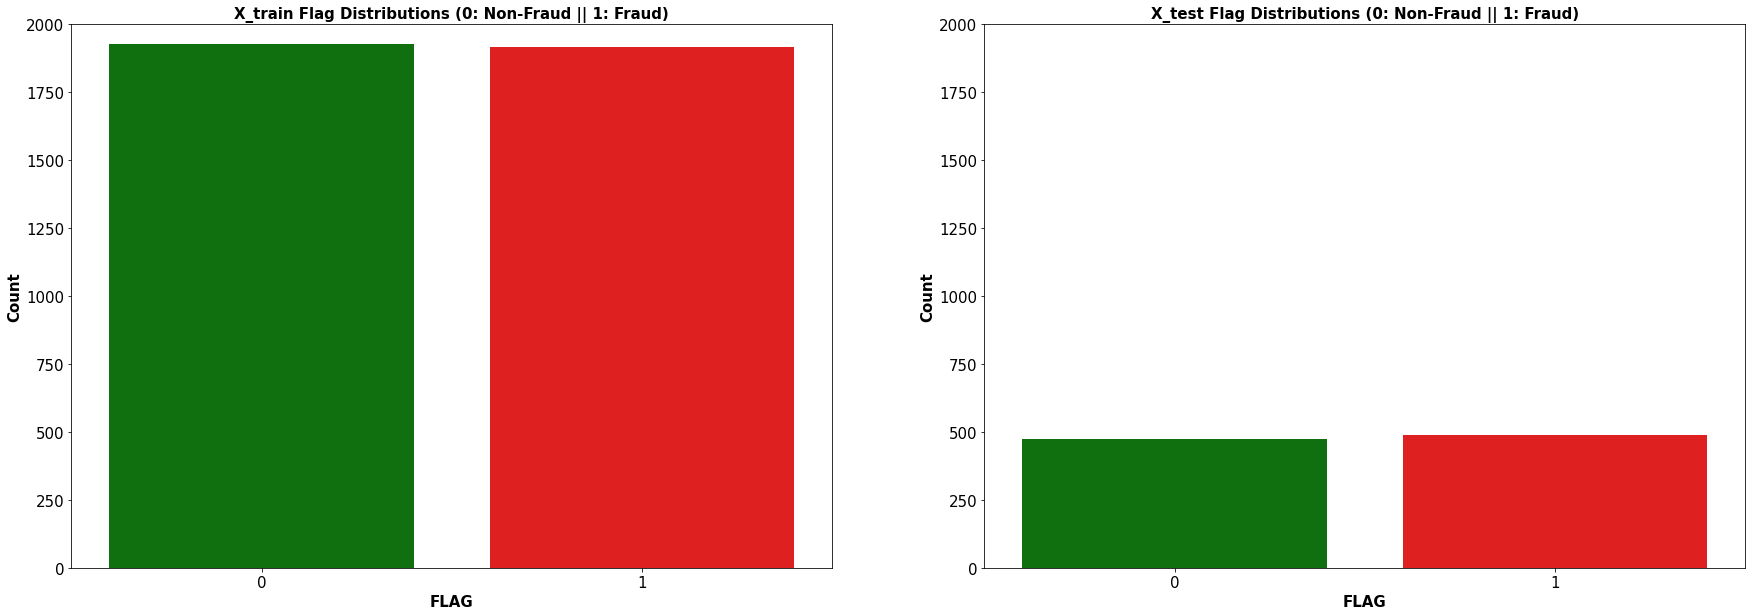

In [ ]:
# Plotting the sets

fig, ax = plt.subplots(1, 2, figsize=(30, 10))
plt.subplot(1, 2, 1)
colors = ["green", "red"]
df_train = pd.DataFrame(y_train.value_counts())
ax = sns.countplot(y_train, data=df_train, palette=colors)
ax.set_ylim(0, 2000)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
plt.xlabel('FLAG', fontweight='bold', fontsize=15)
plt.ylabel('Count', fontweight='bold', fontsize=15)
plt.title('X_train Flag Distributions (0: Non-Fraud || 1: Fraud)', fontweight='bold', fontsize=15)

plt.subplot(1, 2, 2)
colors = ["green", "red"]
df_train = pd.DataFrame(y_test.value_counts())
ax = sns.countplot(y_test, data=df_train, palette=colors)
ax.set_ylim(0, 2000)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
plt.xlabel('FLAG', fontweight='bold', fontsize=15)
plt.ylabel('Count', fontweight='bold', fontsize=15)
plt.title('X_test Flag Distributions (0: Non-Fraud || 1: Fraud)', fontweight='bold', fontsize=15)

print("After", program_name, ":")
print("X_train:")
print('No Frauds', round(y_train.value_counts()[0]/len(y_train) * 100,2), '% of the dataset:', y_train.value_counts()[0])
print('Frauds', round(y_train.value_counts()[1]/len(y_train) * 100,2), '% of the dataset:', y_train.value_counts()[1])
print("")
print("X_test:")
print('No Frauds', round(y_test.value_counts()[0]/len(y_test) * 100,2), '% of the dataset:', y_test.value_counts()[0])
print('Frauds', round(y_test.value_counts()[1]/len(y_test) * 100,2), '% of the dataset:', y_test.value_counts()[1])
print("")

plt.show()

In [ ]:
# mlp_best_result = MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
#               beta_2=0.999, early_stopping=False, epsilon=1e-08,
#               hidden_layer_sizes=(10, 24), learning_rate='constant',
#               learning_rate_init=0.09, max_fun=15000, max_iter=1500,
#               momentum=0.9, n_iter_no_change=80, nesterovs_momentum=True,
#               power_t=0.5, random_state=None, shuffle=True, solver='sgd',
#               tol=0.0001, validation_fraction=0.1, verbose=False,
#               warm_start=False)

In [ ]:
# svc_best_result = SVC(C=10.0, break_ties=False, cache_size=200, class_weight='balanced',
#     coef0=0.0, decision_function_shape='ovr', degree=1.0, gamma='scale',
#     kernel='rbf', max_iter=-1, probability=True, random_state=None,
#     shrinking=True, tol=0.001, verbose=False)

In [ ]:
# xgboost_best_result = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=1.0, gamma=0,
#               learning_rate=0.1, max_delta_step=0, max_depth=9,
#               min_child_weight=6.0, missing=None, n_estimators=100, n_jobs=1,
#               nthread=4, objective='binary:logistic', random_state=0,
#               reg_alpha=0.005, reg_lambda=1, scale_pos_weight=1.0, seed=27,
#               silent=None, subsample=0.7, verbosity=1)

In [ ]:
# rf_best_result = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
#                        criterion='gini', max_depth=30, max_features='auto',
#                        max_leaf_nodes=None, max_samples=None,
#                        min_impurity_decrease=0.0, min_impurity_split=None,
#                        min_samples_leaf=1, min_samples_split=10,
#                        min_weight_fraction_leaf=0.0, n_estimators=600,
#                        n_jobs=None, oob_score=False, random_state=0, verbose=0,
#                        warm_start=False)

In [ ]:
# Classifiers with default parameters
mlp_best_result = MLPClassifier()
svc_best_result = SVC(probability=True)
xgboost_best_result = XGBClassifier()
rf_best_result = RandomForestClassifier()

In [ ]:
# Print results performance for all classifiers using Train and Test set
from sklearn.metrics import precision_recall_fscore_support as score

start_time = datetime.now() 

# With GA
#print("Best Classifiers:\n", mlp_best_result, "\n", svc_best_result, "\n", xgboost_best_result, "\n", rf_best_result, "\n")
classifiers = [mlp_best_result, 
               svc_best_result, 
               xgboost_best_result,
               rf_best_result]

# Without GA
#classifiers = [MLPClassifier(alpha=0.05, hidden_layer_sizes=(50, 100, 50), activation='relu', solver='sgd', max_iter=2000, learning_rate='constant'), 
#               SVC(kernel='linear', probability=True), 
#               XGBClassifier(learning_rate=0.1, n_estimators=1000, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic', nthread=4, scale_pos_weight=1, seed=27),
#               RandomForestClassifier(n_estimators=20, max_depth=None, min_samples_split=10, random_state=0)]

# Define a result table as a DataFrame
result_table_train = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
result_table_train_f1 = pd.DataFrame(columns=['Classifiers', 'Accuracy', 'F1Score', 'AUC', 'AveragePrecisionRecall'])

result_table_test = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
result_table_test_f1 = pd.DataFrame(columns=['Classifiers', 'Accuracy', 'F1Score', 'AUC', 'AveragePrecisionRecall'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)

# TRAIN set
    yproba = model.predict_proba(X_train)[::,1]
    fpr, tpr, _ = roc_curve(y_train,  yproba)
    auc = roc_auc_score(y_train, yproba)
    result_table_train = result_table_train.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
    
    print("===========================================================================================")
    print("Classifier = ", cls)
    print("TRAIN SET")
    y_pred = cls.predict(X_train)
    print(confusion_matrix(y_train, y_pred))
    print(classification_report(y_train, y_pred))
    accuracy = accuracy_score(y_train, y_pred)
    f1score = f1_score(y_train, y_pred, pos_label=1, average='macro')
    average_precision = average_precision_score(y_train, y_pred, average='weighted')
    print("Accuracy : ", accuracy)
    print("F1 Score : ", f1score)
    print("AUC : ", auc)
    print("Average Precision Recall: ", average_precision)
    print("")
    report = classification_report(y_train, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    df_report_csv = pd.DataFrame(columns = [str(cls)[0:3]+'_TRAIN'])
    df_report_csv.to_csv("{}_result.csv".format(program_name), sep=',', mode='a', index=True)
    df_report.iloc[[0, 1, 4]].to_csv("{}_result.csv".format(program_name), sep=',', mode='a', index=True)
    #result_table_train2 = result_table_train2.append({'Classifiers':cls.__class__.__name__,
    result_table_train_f1 = result_table_train_f1.append({'Classifiers':str(cls)[0:3],
                                        'Accuracy':accuracy, 
                                        'F1Score':f1score, 
                                        'AUC':auc, 
                                        'AveragePrecisionRecall':average_precision}, ignore_index=True)
    
    precision, recall, fscore, support = score(y_train, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
    specificity = tn / (tn+fp)
    print('Accuracy: {}'.format(np.round(accuracy * 100, 2)))
    print('Sensitivity: {}'.format(np.round(recall * 100, 2)))
    print('Specificity: {}'.format(np.round(specificity * 100, 2)))
    print('Precision: {}'.format(np.round(precision * 100, 2)))
    print('Fscore: {}'.format(np.round(fscore * 100, 2)))

# TEST set
    yproba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    result_table_test = result_table_test.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
    
    print("TEST SET")
    y_pred = cls.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred, pos_label=1, average='macro')
    average_precision = average_precision_score(y_test, y_pred, average='weighted')
    print("Accuracy : ", accuracy)
    print("F1 Score : ", f1score)
    print("AUC : ", auc)
    print("Average Precision Recall: ", average_precision)
    print("")
    report = classification_report(y_test, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    df_report_csv = pd.DataFrame(columns = [str(cls)[0:3]+'_TEST'])
    df_report_csv.to_csv("{}_result.csv".format(program_name), sep=',', mode='a', index=True)
    df_report.iloc[[0, 1, 4]].to_csv("{}_result.csv".format(program_name), sep=',', mode='a', index=True)
    result_table_test_f1 = result_table_test_f1.append({'Classifiers':str(cls)[0:3],
                                        'Accuracy':accuracy, 
                                        'F1Score':f1score, 
                                        'AUC':auc, 
                                        'AveragePrecisionRecall':average_precision}, ignore_index=True)
    
    precision, recall, fscore, support = score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn+fp)
    print('Accuracy: {}'.format(np.round(accuracy * 100, 2)))
    print('Sensitivity: {}'.format(np.round(recall * 100, 2)))
    print('Specificity: {}'.format(np.round(specificity * 100, 2)))
    print('Precision: {}'.format(np.round(precision * 100, 2)))
    print('Fscore: {}'.format(np.round(fscore * 100, 2)))

# Set name of the classifiers as index labels
result_table_train.set_index('classifiers', inplace=True)
#result_table_train_f1.set_index('Classifiers', inplace=True)

# Set name of the classifiers as index labels
result_table_test.set_index('classifiers', inplace=True)
#result_table_test_f1.set_index('Classifiers', inplace=True)

print('All Classifiers elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))
print(mytime)

Classifier =  MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
TRAIN SET
[[1859   69]
 [  93 1822]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1928
           1       0.96      0.95      0.96      1915

    accuracy                           0.96      3843
   macro avg       0.96      0.96      0.96      3843
weighted avg       0.96      0.96      0.96      3843

Accuracy :  0.9578454332552693
F1 Score :  0.9578415253181358
AUC :  0.9878359858292796
Average 

GWO Train set result:
              Accuracy   F1Score       AUC  AveragePrecisionRecall
Classifiers                                                      
MLP          0.957845  0.957842  0.987836                0.940919
SVC          0.787406  0.777004  0.954956                0.785962
XGB          0.959407  0.959337  0.986764                0.957837
Ran          1.000000  1.000000  1.000000                1.000000


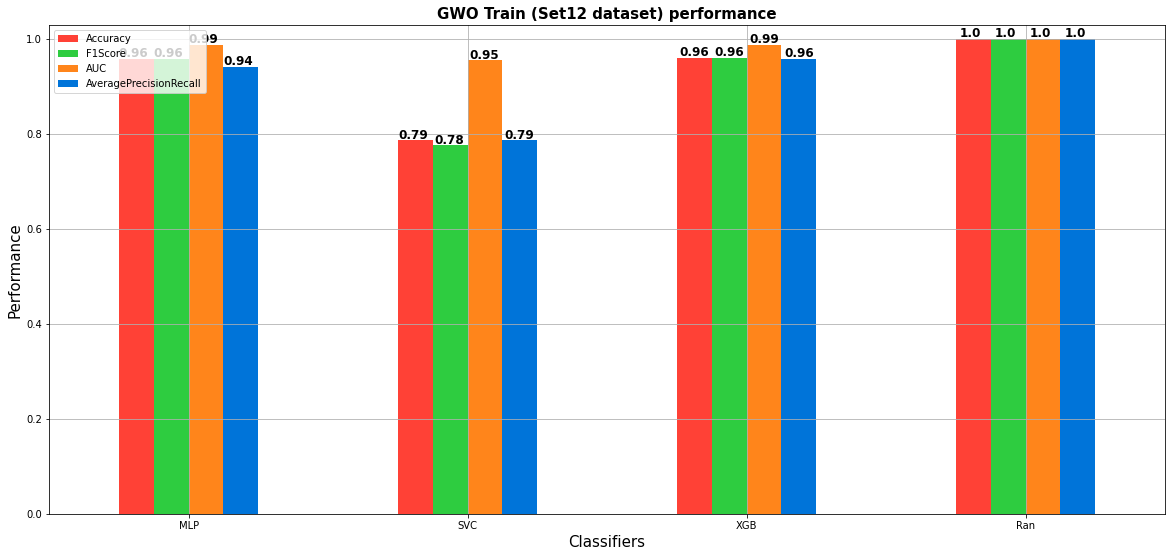


GWO Test set result:
              Accuracy   F1Score       AUC  AveragePrecisionRecall
Classifiers                                                      
MLP          0.873049  0.873042  0.941435                0.834805
SVC          0.775234  0.764736  0.957273                0.781234
XGB          0.918835  0.918739  0.963338                0.905544
Ran          0.915713  0.915660  0.966947                0.897278


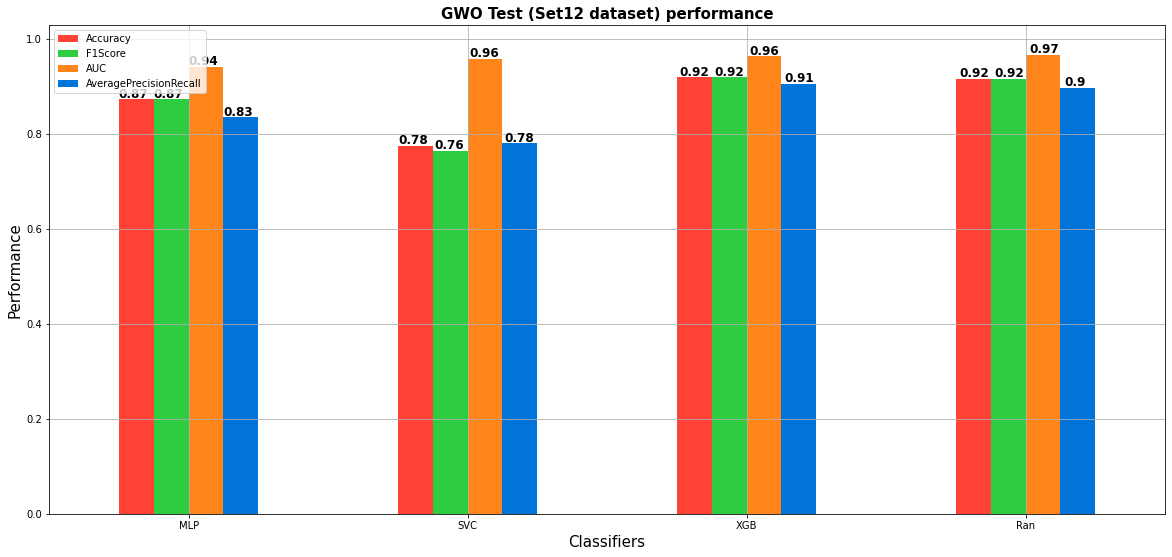

In [ ]:
# Results performance bar plot

color = ('#FF4136', '#2ECC40', '#FF851B', '#0074D9')
#FF851B orange, #FF4136 red, #0074D9, blue, #2ECC40 green)

# Function plotting the results performance
def plot_result(result_table, result_set):
  result_table = result_table.set_index('Classifiers')
  print(program_name, result_set, 'set result:\n', result_table)
  #ax = result_table.loc[:,['Accuracy','F1Score', 'AUC', 'AveragePrecisionRecall']].plot.bar(color=color, figsize=(20, 9))
  ax = result_table.plot.bar(color=color, figsize=(20, 9))
  plt.xticks(rotation=0)
  plt.ylabel("Performance", fontsize=15)
  plt.xlabel("Classifiers", fontsize=15)
  plt.ylim(0, 1.03)
  plt.grid(True)
  plt.legend(loc=2)
  plt.title('{} {} ({} dataset) performance'.format(program_name, result_set, dataset_set), fontweight='bold', fontsize=15)
  
  i = 0
  label = np.round(result_table.Accuracy.values, 2)
  for p in ax.patches:
      ax.annotate(str(round(p.get_height(),2 )), (p.get_x() * 1.005, p.get_height() * 1.005), fontweight='bold', fontsize=12)
      i = i+1

  plt.show()            
  print("")

plot_result(result_table_train_f1, "Train")
plot_result(result_table_test_f1, "Test")

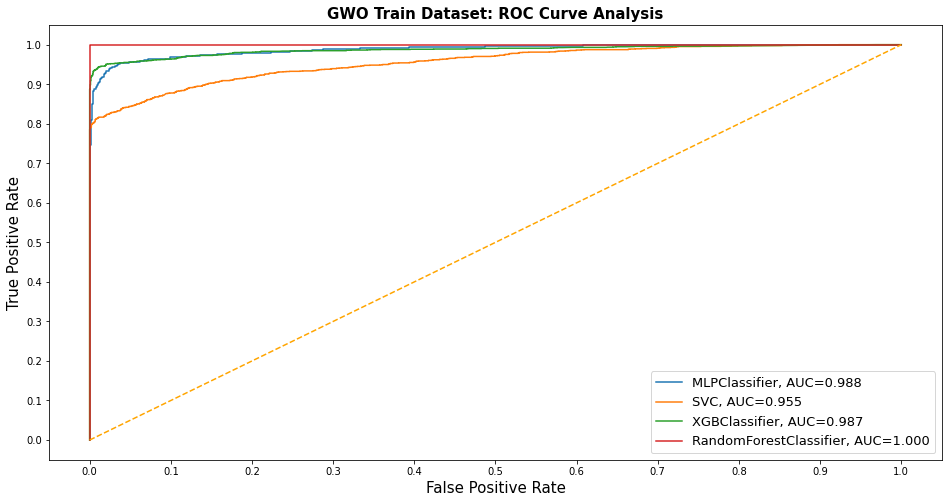

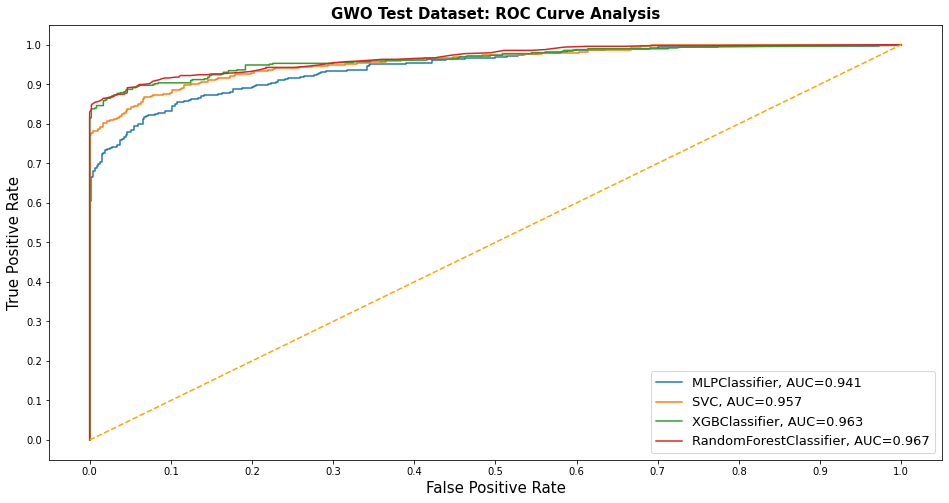

In [ ]:
# Plotting ROC/AUC

# Function plotting AUC
def plot_roc(result_table, result_set):
  fig1 = plt.figure(1, figsize=(16,8))
  for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
  plt.plot([0,1], [0,1], color='orange', linestyle='--')
  plt.xticks(np.arange(0.0, 1.1, step=0.1))
  plt.xlabel("False Positive Rate", fontsize=15)
  plt.yticks(np.arange(0.0, 1.1, step=0.1))
  plt.ylabel("True Positive Rate", fontsize=15)
  #plt.title('{} {} ({} dataset): ROC Curve Analysis'.format(program_name, result_set, dataset_set), fontweight='bold', fontsize=15)
  plt.title('GWO {} Dataset: ROC Curve Analysis'.format(result_set), fontweight='bold', fontsize=15)
  plt.legend(prop={'size':13}, loc='lower right')

  plt.show()
  #fig.savefig('multiple_roc_curve.png')

plot_roc(result_table_train, "Train")
plot_roc(result_table_test, "Test")

In [ ]:
print('TOTAL elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - first_start_time))
print(mytime)
print("ALL DONE")

TOTAL elapsed (hh:mm:ss.ms) 0:41:01.590070
2020-06-26 17:16:43.650798+08:00
ALL DONE


In [ ]:
# df_scaled_flag0_alpha_final = pd.DataFrame([])
# for i in range(0, alpha_final_unique.shape[0]):
#     #print(df_scaled_flag0.iloc[[alpha_final[i]]])
#     # Create new df from alpha 
#     df_scaled_flag0_alpha = pd.DataFrame(df_scaled_flag0_Ori.iloc[[alpha_final_unique[i]]])
#     df_scaled_flag0_alpha_final = pd.DataFrame.append(df_scaled_flag0_alpha_final, df_scaled_flag0_alpha)

# df_scaled_flag0_alpha_final

In [ ]:
# print("Alpha_pos", Alpha_pos)
# print("Alpha_score", Alpha_score)
# print("")
# print("Beta_pos", Beta_pos)
# print("Beta_score", Beta_score)

In [ ]:
# print("Alpha_pos", Alpha_pos)
# a = scipy.spatial.distance.cdist(df_scaled_flag0.iloc[[Alpha_pos[0]]], df_scaled_flag0.iloc[[Alpha_pos[1]]], metric='minkowski')
# print(a[0])
# print("")
# print("Beta_pos", Beta_pos)
# b = scipy.spatial.distance.cdist(df_scaled_flag0.iloc[[Beta_pos[0]]], df_scaled_flag0.iloc[[Beta_pos[1]]], metric='minkowski')
# print(b[0])